In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import numpy as np
import descartes
from shapely.geometry import Point, Polygon
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/DTR/Water-Pipe-Project/full_dataset.csv')

df["SLOPE_PCT"] = df["SLOPE_PCT"].replace([0], 0.5)
df["Slope Percentage"] = np.log(df["SLOPE_PCT"])

df["STREETTYPE"].replace(" ", np.nan, inplace=True)
df.dropna(subset=["STREETTYPE"], inplace=True)

df["Neighborhood"] =  df["STREETTYPE"]

/Users/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (11,21,22,23,59,76) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
sns.set_theme(style="whitegrid") 

sns.violinplot(x="Slope Percentage", 
                    y="Neighborhood", 
                    data=df, 
                    inner="stick",
                    width = 0.9)

In [4]:
df["Slope Percentage"] = df["SLOPE_PCT"]
pipebreaks_neighborhood = df.groupby(['Neighborhood', 'Slope Percentage'], as_index=False)['Target'].sum() 
pipebreaks_neighborhood.dropna(axis='index')

,Neighborhood,Slope Percentage,Target
0,Alley,0.5,2
1,Alley,1.0,1
2,Alley,2.0,4
3,Alley,3.0,0
4,Alley,4.0,0
...,...,...,...
188,Urban Village Neighborhood Access,16.0,2
189,Urban Village Neighborhood Access,17.0,2
190,Urban Village Neighborhood Access,18.0,0
191,Urban Village Neighborhood Access,20.0,0


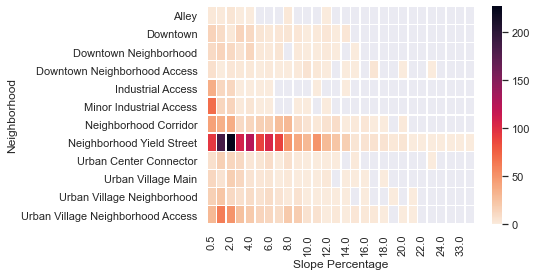

In [5]:
sns.set()
cmap = sns.cm.rocket_r
heater_map = pipebreaks_neighborhood.pivot('Neighborhood','Slope Percentage','Target')
ax = sns.heatmap(heater_map, robust=False, square=False, 
                 cmap= cmap,
                 linewidth=.5 
                )

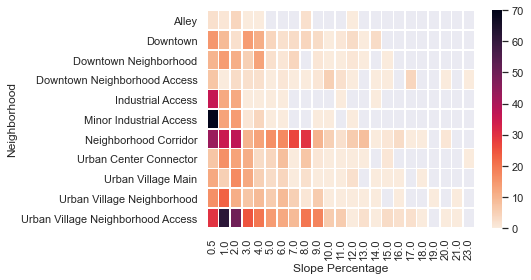

In [6]:
pipebreaks_neighborhood["Neighborhood"].replace("Neighborhood Yield Street", np.nan, inplace=True)
pipebreaks_neighborhood.dropna(subset=["Neighborhood"], inplace=True)

sns.set()
cmap = sns.cm.rocket_r
heater_map = pipebreaks_neighborhood.pivot('Neighborhood','Slope Percentage','Target')
ax = sns.heatmap(heater_map, robust=False, square=False, 
                 cmap= cmap,
                 linewidth=.5 
                )